<a href="https://colab.research.google.com/github/hosseynkebria/mv/blob/main/MV_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
# from PIL import ImageEnhance
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Show Tensors with torchvision
# import torchvision
# newtensor = torchvision.io.read_image('C:\\Users\\hosse\\OneDrive\\Desktop\\myImage.jpg')
# newtensor

My image Tensor is this :

	tensor([[[0.4824, 0.4627, 0.4627,  ..., 0.1961, 0.1412, 0.1176],
         [0.4824, 0.4627, 0.4588,  ..., 0.2000, 0.1529, 0.1373],
         [0.4863, 0.4627, 0.4588,  ..., 0.2039, 0.1686, 0.1608],
         ...,
         [0.2118, 0.2118, 0.2157,  ..., 0.7059, 0.7255, 0.7451],
         [0.1922, 0.1843, 0.2431,  ..., 0.6902, 0.7137, 0.7373],
         [0.2275, 0.2392, 0.1569,  ..., 0.6627, 0.6902, 0.7137]],

        [[0.4157, 0.3961, 0.3961,  ..., 0.1725, 0.1216, 0.0980],
         [0.4078, 0.3961, 0.3922,  ..., 0.1765, 0.1333, 0.1176],
         [0.4039, 0.3922, 0.3843,  ..., 0.1804, 0.1490, 0.1412],
         ...,
         [0.2196, 0.2314, 0.2353,  ..., 0.7412, 0.7647, 0.7843],
         [0.2118, 0.2039, 0.2627,  ..., 0.7098, 0.7333, 0.7608],
         [0.2471, 0.2588, 0.1843,  ..., 0.6784, 0.7059, 0.7333]],

        [[0.3451, 0.3255, 0.3333,  ..., 0.0863, 0.0431, 0.0196],
         [0.3412, 0.3255, 0.3294,  ..., 0.0902, 0.0549, 0.0392],
         [0.3294, 0.3137, 0.31

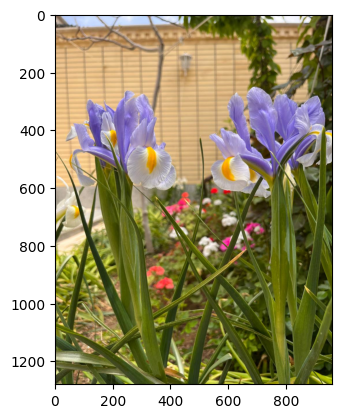

In [ ]:
path = 'myImage.jpg'
image = Image.open(path)
img_to_tensor = transforms.ToTensor()
tensor = img_to_tensor(image)
print(f'My image Tensor is this :\n\n\t{tensor}\n\nImage Size is : \n\n\twidth:{image.size[0]}\n\theight:{image.size[1]}')
plt.imshow(image) #Plot it with matplotlib

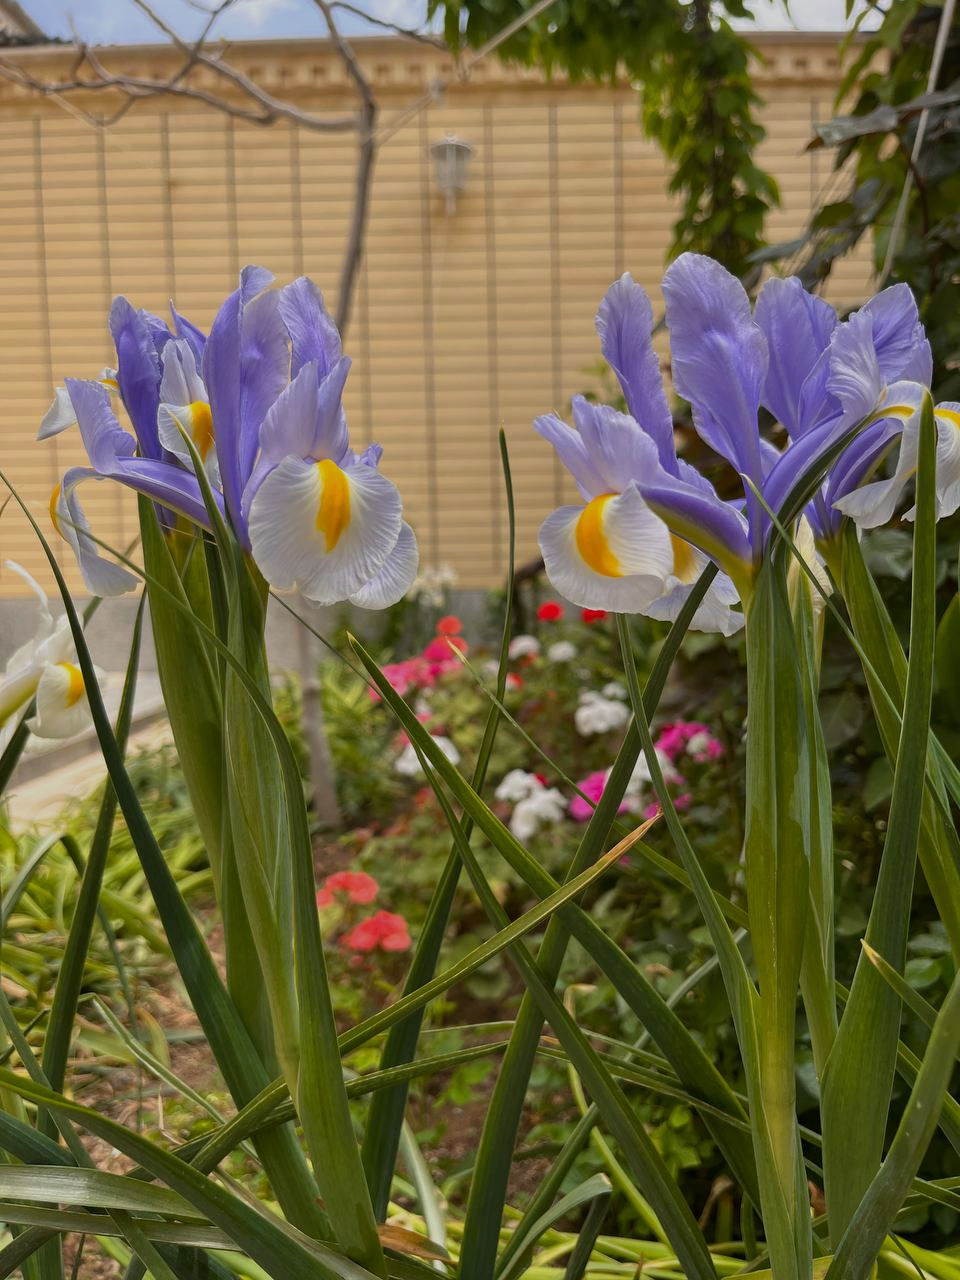

In [ ]:
alpha = np.random.random() #Image with random brightness
# WITH IMAGE ENHANCE
# brightened_image = ImageEnhance.Brightness(image)
# brightened_image = brightened_image.enhance(alpha)
# brightened_image

#WITH ColorJitter
brightness_transform = transforms.ColorJitter(brightness=alpha)
brightened_image = brightness_transform(image)
brightened_image

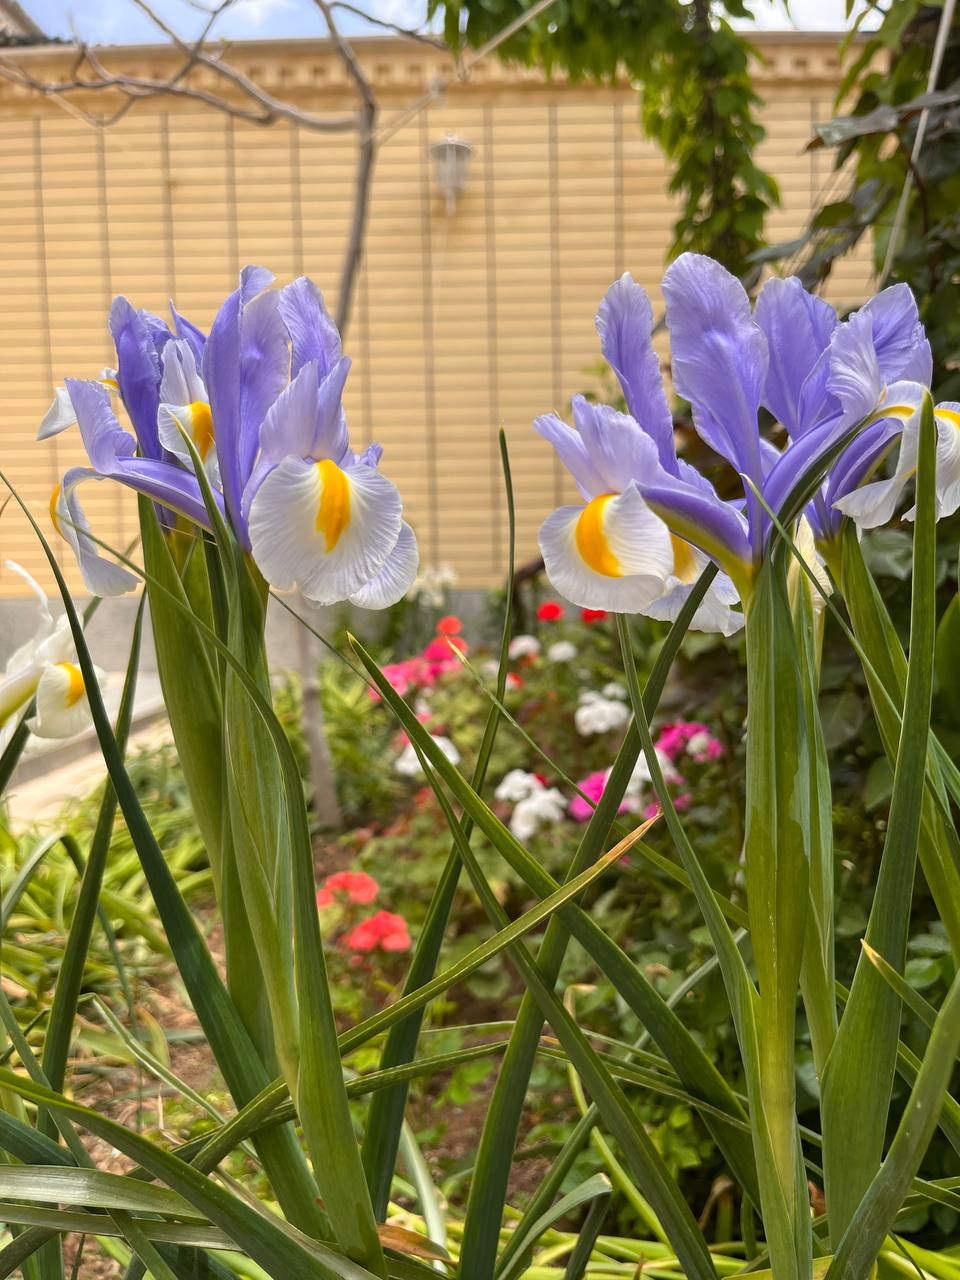

In [ ]:
#Transform image TENSOR to the Image (It's not neccesarry , but it can be useful)
transformed_image = transforms.ToPILImage()(tensor)
transformed_image

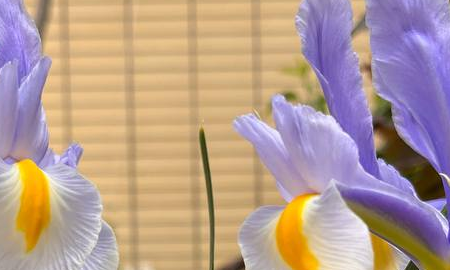

In [ ]:
x = 300
y = 300
width = 450
height = 270
crop_box = (x, y, x + width, y + height)  # Define the crop box (x, y, x_end, y_end)
cropped_region = transformed_image.crop(crop_box)
cropped_region

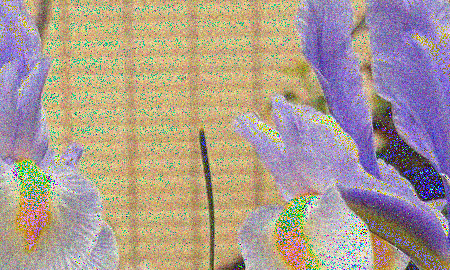

In [ ]:
#Add noise to photo
# Define a noise_adder to add random noise
noise_adder = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x + 0.1 * torch.randn_like(x)),
])

# Apply the transform to the image
noisy_image_tensor = noise_adder(cropped_region)

# Convert the tensor back to a PIL image
noisy_image = transforms.ToPILImage()(noisy_image_tensor)
noisy_image

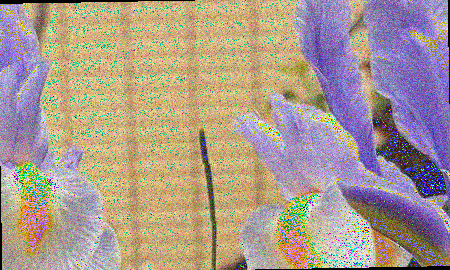

In [ ]:
#Rotate photo
angle_to_rotate = 1  # Change this value as needed
rotated_image = noisy_image.rotate(angle_to_rotate)

#Display the rotated image
rotated_image


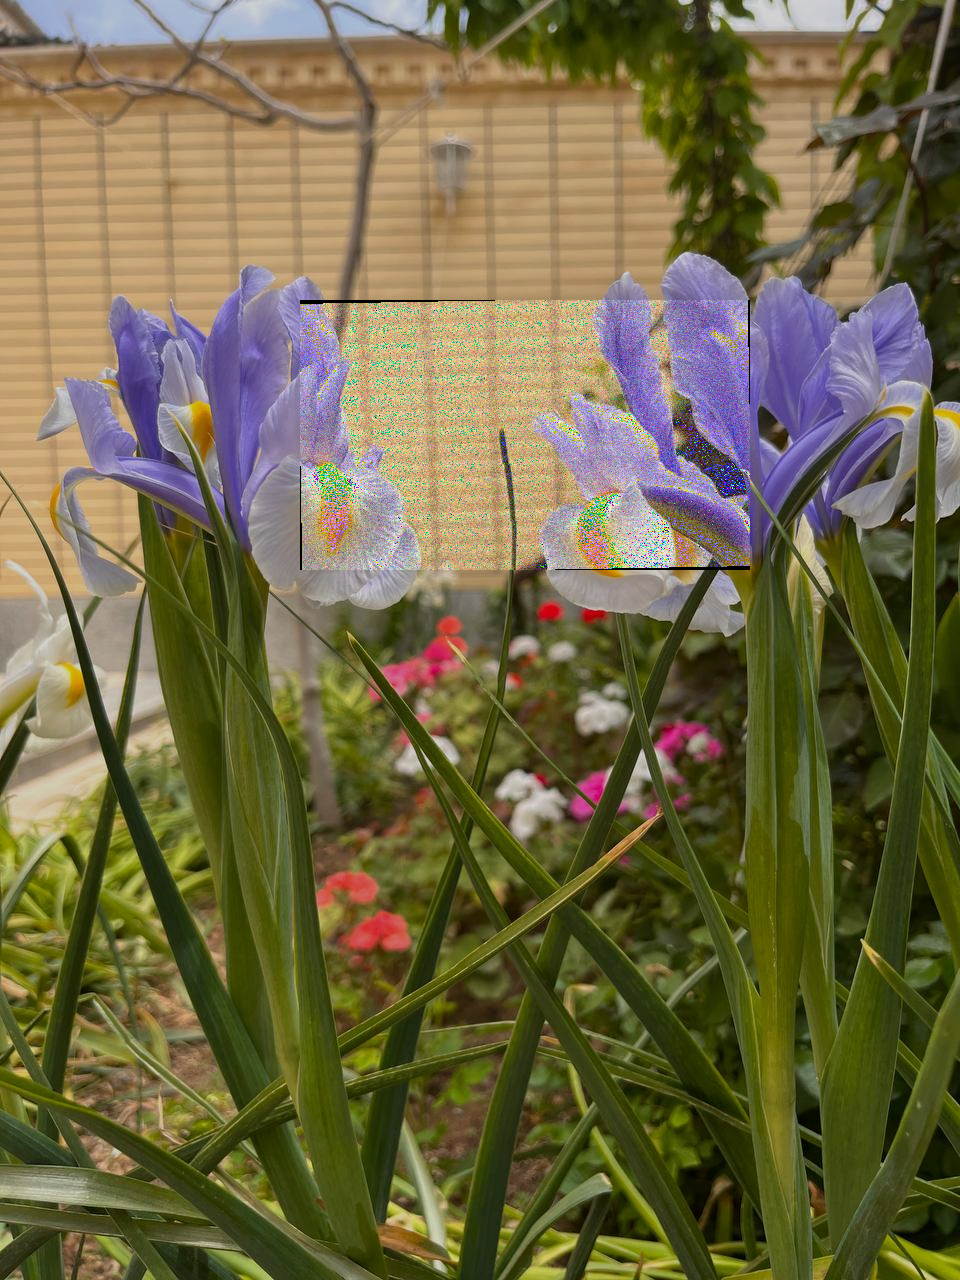

In [ ]:
modified_cropped_image = transforms.ToPILImage(rotated_image)
brightened_image.paste(rotated_image, crop_box)
brightened_image

In [ ]:
def image_correlation(image1_path, image2_path):
    # Load the images
    image1 = np.array(image1_path.convert('RGB'))  # Convert to grayscale
    image2 = np.array(image2_path.convert('RGB'))

    # Flatten the images
    flat_image1 = image1.flatten()
    flat_image2 = image2.flatten()

    # Calculate the correlation coefficient
    correlation_coefficient = np.corrcoef(flat_image1, flat_image2)[0, 1]

    return correlation_coefficient


image_correlation(brightened_image,transformed_image)

0.9595247696320145